In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import json
import zipfile


# 공감형 대화 데이터셋 전체 데이터

In [7]:
training_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터"  #train set 
validation_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Validation/02.라벨링데이터" #validation set

In [8]:
def unzip_files_in_directory(directory, output_directory):
    # Check if output directory exists, if not, create it
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # List all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".zip"):
            zip_path = os.path.join(directory, filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(output_directory)
            print(f"Unzipped: {filename}")


train_input_directory = training_path  
train_output_directory = os.path.join(training_path, 'real_data')
validation_input_directory = validation_path  
validation_output_directory = os.path.join(validation_path, 'real_data')

unzip_files_in_directory(train_input_directory, train_output_directory)
unzip_files_in_directory(validation_input_directory, validation_output_directory)

Unzipped: TL_기쁨_부모자녀,조손.zip
Unzipped: TL_기쁨_부부.zip
Unzipped: TL_기쁨_연인.zip
Unzipped: TL_기쁨_지인.zip
Unzipped: TL_기쁨_직장 동료.zip
Unzipped: TL_기쁨_친구.zip
Unzipped: TL_기쁨_형제,자매.zip
Unzipped: TL_당황_부모자녀,조손.zip
Unzipped: TL_당황_부부.zip
Unzipped: TL_당황_연인.zip
Unzipped: TL_당황_지인.zip
Unzipped: TL_당황_직장 동료.zip
Unzipped: TL_당황_친구.zip
Unzipped: TL_당황_형제,자매.zip
Unzipped: TL_분노_부모자녀,조손.zip
Unzipped: TL_분노_부부.zip
Unzipped: TL_분노_연인.zip
Unzipped: TL_분노_지인.zip
Unzipped: TL_분노_직장 동료.zip
Unzipped: TL_분노_친구.zip
Unzipped: TL_분노_형제,자매.zip
Unzipped: TL_불안_부모자녀,조손.zip
Unzipped: TL_불안_부부.zip
Unzipped: TL_불안_연인.zip
Unzipped: TL_불안_지인.zip
Unzipped: TL_불안_직장 동료.zip
Unzipped: TL_불안_친구.zip
Unzipped: TL_불안_형제,자매.zip
Unzipped: TL_상처_부모자녀,조손.zip
Unzipped: TL_상처_부부.zip
Unzipped: TL_상처_연인.zip
Unzipped: TL_상처_지인.zip
Unzipped: TL_상처_직장 동료.zip
Unzipped: TL_상처_친구.zip
Unzipped: TL_상처_형제,자매.zip
Unzipped: TL_슬픔_부모자녀,조손.zip
Unzipped: TL_슬픔_부부.zip
Unzipped: TL_슬픔_연인.zip
Unzipped: TL_슬픔_지인.zip
Unzipped: TL_슬픔_직장 동료.zip
Unzipped: TL_슬픔_친

In [10]:
# 파일 개수 각각 확인
def count_files_in_directory(directory):
    files = os.listdir(directory)
    n_files = len(files)
    return print(f'{directory}: {n_files}')

count_files_in_directory(train_output_directory) #25456개 대화
count_files_in_directory(validation_output_directory) #3182개 대화

C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터\real_data: 25456
C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Validation/02.라벨링데이터\real_data: 3182


In [12]:
# 각 파일의 큰 대화 테마 개수
from collections import Counter

emotions = ["기쁨", "당황", "분노", "불안", "상처", "슬픔"]

def count_emotion_files(directory, emotions):
    emotion_counter = Counter()
    
    for filename in os.listdir(directory):
        for emotion in emotions:
            if emotion in filename:
                emotion_counter[emotion] +=1
    return emotion_counter

train_emotion_count = count_emotion_files(train_output_directory, emotions)
validation_emotion_count = count_emotion_files(validation_output_directory, emotions)

print("Training set emotion counts:", train_emotion_count)
print("Validation set emotion counts:", validation_emotion_count)


Training set emotion counts: Counter({'분노': 5133, '기쁨': 5005, '불안': 3849, '슬픔': 3848, '당황': 3828, '상처': 3793})
Validation set emotion counts: Counter({'분노': 639, '기쁨': 624, '불안': 493, '슬픔': 479, '당황': 476, '상처': 471})


C:\Users\seowoo kim\AppData\Local\Temp\ipykernel_34764\1688967331.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(train_emotion_count.keys(), rotation=45, fontproperties=font_prop)
C:\Users\seowoo kim\AppData\Local\Temp\ipykernel_34764\1688967331.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(validation_emotion_count.keys(), rotation=45, fontproperties=font_prop)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not

Training set emotion counts: Counter({'분노': 5133, '기쁨': 5005, '불안': 3849, '슬픔': 3848, '당황': 3828, '상처': 3793})
Validation set emotion counts: Counter({'분노': 639, '기쁨': 624, '불안': 493, '슬픔': 479, '당황': 476, '상처': 471})


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


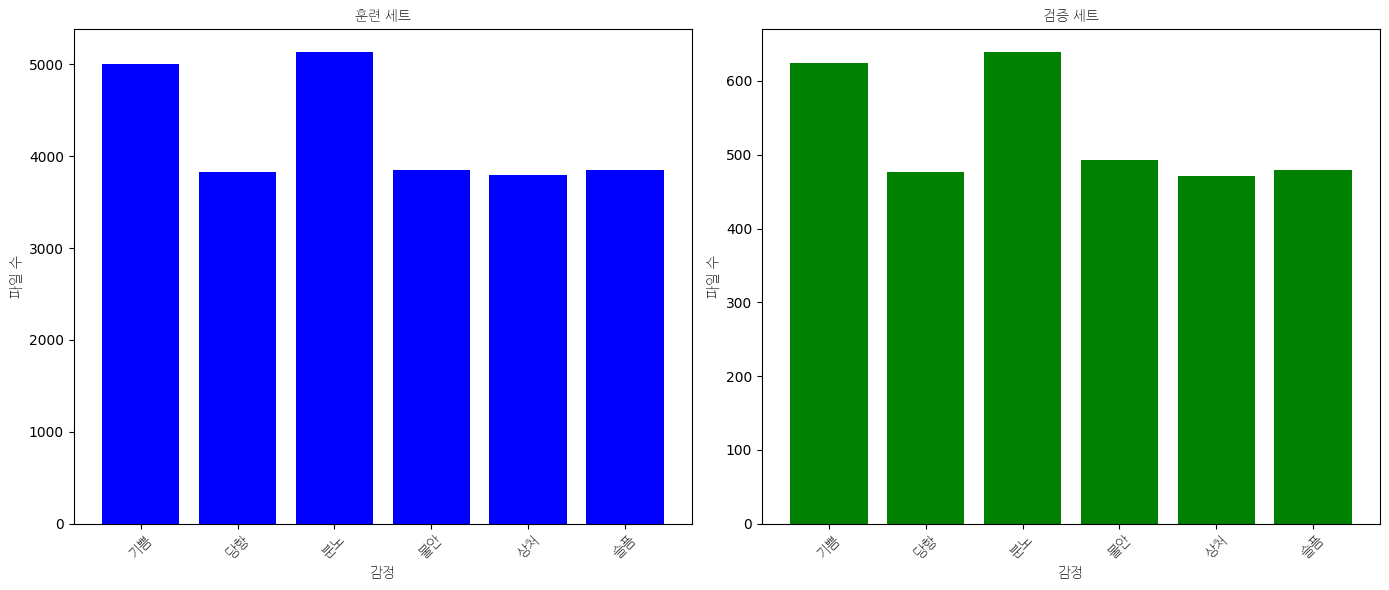

In [25]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# Define the emotions you are looking for
emotions = ["기쁨", "당황", "분노", "불안", "상처", "슬픔"]

# Set up Korean font
font_path = 'C:/Windows/Fonts/NanumGothicLight.ttf'  # Ensure this path is correct
font_prop = fm.FontProperties(fname=font_path)

def count_emotion_files(directory, emotions):
    # Initialize a counter for each emotion
    emotion_counter = Counter()
    
    # List all files in the directory
    for filename in os.listdir(directory):
        for emotion in emotions:
            if emotion in filename:
                emotion_counter[emotion] += 1
                
    return emotion_counter

# Paths
training_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터"
validation_path = "C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Validation/02.라벨링데이터"

# Output directories
train_output_directory = os.path.join(training_path, 'real_data')
validation_output_directory = os.path.join(validation_path, 'real_data')

# Count files
train_emotion_count = count_emotion_files(train_output_directory, emotions)
validation_emotion_count = count_emotion_files(validation_output_directory, emotions)

# Print the counts
print("Training set emotion counts:", train_emotion_count)
print("Validation set emotion counts:", validation_emotion_count)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Training set plot
ax1.bar(train_emotion_count.keys(), train_emotion_count.values(), color='b')
ax1.set_xlabel('감정', fontproperties=font_prop)
ax1.set_ylabel('파일 수', fontproperties=font_prop)
ax1.set_title('훈련 세트', fontproperties=font_prop)
ax1.set_xticklabels(train_emotion_count.keys(), rotation=45, fontproperties=font_prop)

# Validation set plot
ax2.bar(validation_emotion_count.keys(), validation_emotion_count.values(), color='g')
ax2.set_xlabel('감정', fontproperties=font_prop)
ax2.set_ylabel('파일 수', fontproperties=font_prop)
ax2.set_title('검증 세트', fontproperties=font_prop)
ax2.set_xticklabels(validation_emotion_count.keys(), rotation=45, fontproperties=font_prop)

plt.tight_layout()
plt.show()


## 파일 EDA

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

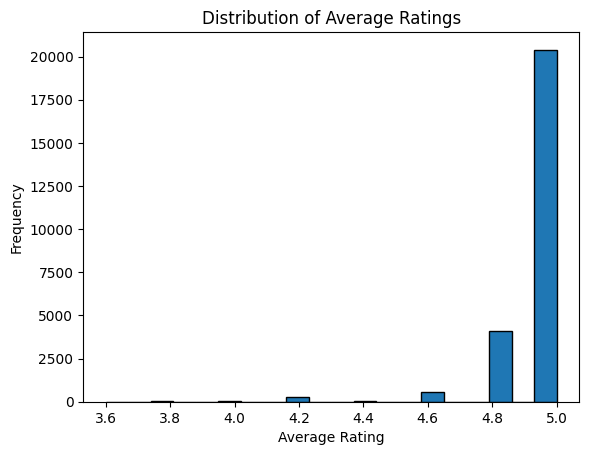

In [26]:
# rating이 낮은 게 있는지 알아보기

ratings = []

for filename in os.listdir(train_output_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(train_output_directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            data = json.load(file)
            avg_rating = data.get('info', {}).get('evaluation', {}).get('avg_rating')
            if avg_rating is not None:
                ratings.append(avg_rating)
                
# avg_rating 값의 분포를 히스토그램으로 시각화
plt.hist(ratings, bins=20, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

결론 => average rating이 모든 데이터가 5점 만점에 3.6 이상이니까, 그냥 다 쓰자!

In [27]:
import os
import json
import pandas as pd

# Define the directory containing the JSON files
data_directory = 'C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터/real_data'

# Initialize an empty list to store the data
data = []

# Define a mapping for emotions and empathy
emotion_mapping = {"기쁨": 1, "당황": 2, "분노": 3, "불안": 4, "상처": 5, "슬픔": 6, None: 0}
empathy_mapping = {"조언": 1, "격려": 2, "위로": 3, "동조": 4, None: 5}

# Function to process each JSON file
def process_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        content = json.load(file)
        
        situation = content['info']['situation']
        speaker_emotion_initial = content['info']['speaker_emotion']
        speaker_emotion = emotion_mapping[speaker_emotion_initial]
        
        for utterance in content['utterances']:
            situation_id = int(utterance['utterance_id'].split('.')[-1])
            role = 1 if utterance['role'] == 'listener' else 0
            change_emotion = 0 if utterance['speaker_changeEmotion'] is None else 1
            terminate = 1 if utterance['terminate'] else 0
            text = utterance['text']
            
            if role == 1:  # listener
                empathy = empathy_mapping.get(utterance['listener_empathy'][0] if utterance['listener_empathy'] else None, 0)
            else:  # speaker
                empathy = 0
            
            if change_emotion:
                speaker_emotion = emotion_mapping.get(utterance['speaker_changeEmotion'], 0)
            
            data.append({
                "situation_id": situation_id,
                "situation": situation,
                "speaker": role,
                "change_emotion": change_emotion,
                "empathy": empathy,
                "speaker_emotion": speaker_emotion,
                "text": text,
                "terminate": terminate
            })

# Process all JSON files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(data_directory, filename)
        process_json_file(filepath)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


   situation_id                      situation  speaker  change_emotion  \
0             1  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
1             2  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
2             3  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
3             4  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
4             5  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   

   empathy  speaker_emotion                                           text  \
0        0                1       엄마, 아기가 태어나니까 내가 부모로서 해야 할 게 참 많은 것 같아요.   
1        3                1                   그렇지? 아기 키우는 게 여간 어려운 일이 아니야.   
2        0                1  어제 평소보다도 격하게 막 온몸을 써가면서 울더라고요. 얼마나 당황했는지 몰라요.   
3        5                1        배가 고파서 그랬던 것 아닐까? 아기들은 배가 고프면 몸부림을 친단다.   
4        0                1       맞아요. 젖을 물려주니 금세 뚝 그쳤어요. 난 분명히 순했을 것 같은데.   

   terminate  
0          0  
1          0  
2          0  
3          0  
4    

In [28]:
import os
import json
import pandas as pd

# Define the directory containing the JSON files
data_directory = 'C:/Users/seowoo kim/Desktop/아이펠톤/046.공감형 대화/01-1.정식개방데이터/Training/02.라벨링데이터/real_data'

# Initialize an empty list to store the data
data = []

# Define a mapping for emotions and empathy
emotion_mapping = {"기쁨": 1, "당황": 2, "분노": 3, "불안": 4, "상처": 5, "슬픔": 6, None: 0}
empathy_mapping = {"조언": 1, "격려": 2, "위로": 3, "동조": 4, None: 5}

# Function to process each JSON file
def process_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        content = json.load(file)
        
        situation = content['info']['situation']
        speaker_emotion_initial = content['info']['speaker_emotion']
        speaker_emotion = emotion_mapping[speaker_emotion_initial]
        
        for utterance in content['utterances']:
            situation_id = int(utterance['utterance_id'].split('.')[-1])
            role = 1 if utterance['role'] == 'listener' else 0
            change_emotion = 0 if utterance['speaker_changeEmotion'] is None else 1
            terminate = 1 if utterance['terminate'] else 0
            text = utterance['text']
            
            if role == 1:  # listener
                empathy_list = utterance['listener_empathy'] if utterance['listener_empathy'] else [None]
                empathy = ','.join(str(empathy_mapping.get(empathy, 0)) for empathy in empathy_list)
            else:  # speaker
                empathy = "0"
            
            if change_emotion:
                speaker_emotion = emotion_mapping.get(utterance['speaker_changeEmotion'], 0)
            
            data.append({
                "situation_id": situation_id,
                "situation": situation,
                "speaker": role,
                "change_emotion": change_emotion,
                "empathy": empathy,
                "speaker_emotion": speaker_emotion,
                "text": text,
                "terminate": terminate
            })

# Process all JSON files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(data_directory, filename)
        process_json_file(filepath)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


   situation_id                      situation  speaker  change_emotion  \
0             1  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
1             2  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
2             3  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   
3             4  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        1               0   
4             5  아이가 태어나니 부모가 배우고 익혀야 할 것이 많다.        0               0   

  empathy  speaker_emotion                                           text  \
0       0                1       엄마, 아기가 태어나니까 내가 부모로서 해야 할 게 참 많은 것 같아요.   
1       3                1                   그렇지? 아기 키우는 게 여간 어려운 일이 아니야.   
2       0                1  어제 평소보다도 격하게 막 온몸을 써가면서 울더라고요. 얼마나 당황했는지 몰라요.   
3       5                1        배가 고파서 그랬던 것 아닐까? 아기들은 배가 고프면 몸부림을 친단다.   
4       0                1       맞아요. 젖을 물려주니 금세 뚝 그쳤어요. 난 분명히 순했을 것 같은데.   

   terminate  
0          0  
1          0  
2          0  
3          0  
4          

In [29]:
df_train = df.copy()

In [30]:
# Define the directory containing the JSON files
data_directory = validation_output_directory 

# Initialize an empty list to store the data
data = []

# Define a mapping for emotions and empathy
emotion_mapping = {"기쁨": 1, "당황": 2, "분노": 3, "불안": 4, "상처": 5, "슬픔": 6, None: 0}
empathy_mapping = {"조언": 1, "격려": 2, "위로": 3, "동조": 4, None: 5}

# Function to process each JSON file
def process_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        content = json.load(file)
        
        situation = content['info']['situation']
        speaker_emotion_initial = content['info']['speaker_emotion']
        speaker_emotion = emotion_mapping[speaker_emotion_initial]
        
        for utterance in content['utterances']:
            situation_id = int(utterance['utterance_id'].split('.')[-1])
            role = 1 if utterance['role'] == 'listener' else 0
            change_emotion = 0 if utterance['speaker_changeEmotion'] is None else 1
            terminate = 1 if utterance['terminate'] else 0
            text = utterance['text']
            
            if role == 1:  # listener
                empathy_list = utterance['listener_empathy'] if utterance['listener_empathy'] else [None]
                empathy = ','.join(str(empathy_mapping.get(empathy, 0)) for empathy in empathy_list)
            else:  # speaker
                empathy = "0"
            
            if change_emotion:
                speaker_emotion = emotion_mapping.get(utterance['speaker_changeEmotion'], 0)
            
            data.append({
                "situation_id": situation_id,
                "situation": situation,
                "speaker": role,
                "change_emotion": change_emotion,
                "empathy": empathy,
                "speaker_emotion": speaker_emotion,
                "text": text,
                "terminate": terminate
            })

# Process all JSON files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(data_directory, filename)
        process_json_file(filepath)

# Create a DataFrame from the collected data
df_validation = pd.DataFrame(data)

# Display the DataFrame
print(df_validation.head())


   situation_id        situation  speaker  change_emotion empathy  \
0             1  성적이 올라 칭찬을 받았다.        0               0       0   
1             2  성적이 올라 칭찬을 받았다.        1               0       4   
2             3  성적이 올라 칭찬을 받았다.        0               0       0   
3             4  성적이 올라 칭찬을 받았다.        1               0       4   
4             5  성적이 올라 칭찬을 받았다.        0               0       0   

   speaker_emotion                                               text  \
0                1  엄마, 학교에서 성적이 나왔는데 꽤 만족스러워요. 빨리 이 점수를 엄마 눈으로 확인...   
1                1  성적 나오자마자 학교에서 연락한 거 보니 점수가 좋은가 보다. 네가 들떠있는 것 같...   
2                1  점수가 많이 향상됐다고 담임 선생님께 칭찬받았어요. 그러니까 더 만족스럽고 기분이 ...   
3                1  칭찬은 누구든 마음이 기쁨의 춤을 추게 하지. 노력의 결과에 칭찬받게 되면 앞으로 ...   
4                1  더구나 많은 친구 앞에서 칭찬해 주시는데 부끄러우면서도 마음에 자신감이 붙더라고요....   

   terminate  
0          0  
1          0  
2          0  
3          0  
4          0  


In [32]:
#일단 파일 내보내기
df_train.to_csv('C:/Users/seowoo kim/Desktop/train_data.csv', index=False, encoding='utf-8-sig')
df_validation.to_csv('C:/Users/seowoo kim/Desktop/validation_data.csv', index=False, encoding='utf-8-sig')